In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from keras.models import load_model

Using TensorFlow backend.


In [3]:
INPUT_DIR = '../input/Financial'
MODELS_DIR = './models'

In [4]:
files = os.listdir(INPUT_DIR)
files

['test_data.csv', 'test_data_hidden.csv', 'train_data.csv']

In [5]:
model_files = os.listdir(MODELS_DIR)
model_files

['clf_LGBMC.model',
 'clf_LR.model',
 'clf_NB.model',
 'clf_RFC.model',
 'clf_XGBC.model',
 'model_ANN_01.h5']

In [6]:
ml_models = []
ann_models = []
for i, model in enumerate(model_files):
    if '.model' in model:
        clf = pickle.load(open(MODELS_DIR + '/' + model, 'rb'))
        ml_models.append(clf)
    else:
        clf = load_model('./models/model_ANN_01.h5')
        ann_models.append(clf)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [7]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error

In [8]:
def print_stats(Ytrain, Yval, Ytrain_, Yval_):
    print('Training Results:')
    print('=================================================')
    print('Accuracy Score:')
    print(accuracy_score(Ytrain, Ytrain_))
    print()
    print('Mean Squared Error:')
    print(mean_squared_error(Ytrain, Ytrain_))
    print()
    print('Log Loss:')
    print(log_loss(Ytrain, Ytrain_))
    print()
    print('ROC_AUC Score:')
    print(roc_auc_score(Ytrain, Ytrain_))
    print()
    print('Precision Score:')
    print(precision_score(Ytrain, Ytrain_))
    print()
    print('Recall Score:')
    print(recall_score(Ytrain, Ytrain_))
    print()
    print('F1 Score:')
    print(f1_score(Ytrain, Ytrain_))
    print()
    print('Confusion Matrix:')
    print(confusion_matrix(Ytrain, Ytrain_))
    print()
    print('Classification Report:')
    print(classification_report(Ytrain, Ytrain_))
    print()
    print('Validation Results:')
    print('=================================================')
    print('Accuracy Score:')
    print(accuracy_score(Yval, Yval_))
    print()
    print('Mean Squared Error:')
    print(mean_squared_error(Yval, Yval_))
    print()
    print('Log Loss:')
    print(log_loss(Yval, Yval_))
    print()
    print('ROC_AUC Score:')
    print(roc_auc_score(Yval, Yval_))
    print()
    print('Precision Score:')
    print(precision_score(Yval, Yval_))
    print()
    print('Recall Score:')
    print(recall_score(Yval, Yval_))
    print()
    print('F1 Score:')
    print(f1_score(Yval, Yval_))
    print()
    print('Confusion Matrix:')
    print(confusion_matrix(Yval, Yval_))
    print()
    print('Classification Report:')
    print(classification_report(Yval, Yval_))
    print()

In [9]:
Xtrain = pickle.load(open('Xtrain.data', 'rb'))
Xtest = pickle.load(open('Xtest.data', 'rb'))
Xval = pickle.load(open('Xval.data', 'rb'))
Ytrain = pickle.load(open('Ytrain.data', 'rb'))
Yval = pickle.load(open('Yval.data', 'rb'))

In [10]:
train_voting_df = pd.DataFrame(data=Ytrain, columns=['Class'])
val_voting_df = pd.DataFrame(data=Yval, columns=['Class'])
test_voting_df = pd.DataFrame(data=np.random.random(Xtest.shape[0]), columns=['Class'])
display(train_voting_df)
display(val_voting_df)
display(test_voting_df)

,Class
0,0
1,0
2,0
3,0
4,0
...,...
62380,1
223988,1
92556,1
92656,1


,Class
0,0
1,0
2,0
3,0
4,0
...,...
56957,0
56958,0
56959,0
56960,0


,Class
0,0.336927
1,0.832695
2,0.727552
3,0.209974
4,0.994020
...,...
56957,0.840718
56958,0.122505
56959,0.668428
56960,0.512011


In [11]:
for i, clf in enumerate(ml_models):
    model_name= 'clf_ml' + '_' + str(i)
    Ytrain_ = clf.predict(Xtrain)
    Yval_ = clf.predict(Xval)
    Ytest_ = clf.predict(Xtest)
    print(clf)
    print_stats(Ytrain, Yval, Ytrain_, Yval_)
    train_voting_df[model_name + '_' + 'Prediction'] = Ytrain_
    val_voting_df[model_name + '_' + 'Prediction'] = Yval_
    test_voting_df[model_name + '_' + 'Prediction'] = Ytest_
display(train_voting_df.head())
display(val_voting_df.head())
display(test_voting_df.head())

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=150, n_jobs=-1, num_leaves=150,
               objective='cross_entropy', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=False, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
Training Results:
Accuracy Score:
1.0

Mean Squared Error:
0.0

Log Loss:
9.99200722162641e-16

ROC_AUC Score:
1.0

Precision Score:
1.0

Recall Score:
1.0

F1 Score:
1.0

Confusion Matrix:
[[227451      0]
 [     0 227451]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00   

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 150 out of 150 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)
Training Results:
Accuracy Score:
1.0

Mean Squared Error:
0.0

Log Loss:
9.99200722162641e-16

ROC_AUC Score:
1.0

Precision Score:
1.0

Recall Score:
1.0

F1 Score:
1.0

Confusion Matrix:
[[227451      0]
 [     0 227451]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.

,Class,clf_ml_0_Prediction,clf_ml_1_Prediction,clf_ml_2_Prediction,clf_ml_3_Prediction,clf_ml_4_Prediction
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


,Class,clf_ml_0_Prediction,clf_ml_1_Prediction,clf_ml_2_Prediction,clf_ml_3_Prediction,clf_ml_4_Prediction
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


,Class,clf_ml_0_Prediction,clf_ml_1_Prediction,clf_ml_2_Prediction,clf_ml_3_Prediction,clf_ml_4_Prediction
0,0.336927,0,0,0,0,0
1,0.832695,0,0,0,0,0
2,0.727552,0,0,0,0,0
3,0.209974,0,0,0,0,0
4,0.994020,0,0,0,0,0


In [12]:
for i, clf in enumerate(ann_models):
    model_name= 'clf_ann' + '_' + str(i)
    Ytrain_ = clf.predict(Xtrain) > 0.5
    Yval_ = clf.predict(Xval) > 0.5
    Ytest_ = clf.predict(Xtest) > 0.5
    print(clf)
    print_stats(Ytrain, Yval, Ytrain_, Yval_)
    train_voting_df[model_name + '_' + 'Prediction'] = Ytrain_
    val_voting_df[model_name + '_' + 'Prediction'] = Yval_
    test_voting_df[model_name + '_' + 'Prediction'] = Ytest_
display(train_voting_df.head())
display(val_voting_df.head())
display(test_voting_df.head())

Training Results:
Accuracy Score:
0.9967113795938466

Mean Squared Error:
0.0032886204061534133

Log Loss:
0.11358755442829967

ROC_AUC Score:
0.9967113795938466

Precision Score:
0.9934657366115301

Recall Score:
1.0

F1 Score:
0.9967221591680946

Confusion Matrix:
[[225955   1496]
 [     0 227451]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.99      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902


Validation Results:
Accuracy Score:
0.9929953302201467

Mean Squared Error:
0.007004669779853236

Log Loss:
0.24193805745221186

ROC_AUC Score:
0.8997199189186086

Precision Score:
0.1721132897603486

Recall Score:
0.8061224489795918

F1 Score:
0.28366247755834834

Confusion Matrix:
[[56484   380]
 [   19    79]]

Classification Report:
       

,Class,clf_ml_0_Prediction,clf_ml_1_Prediction,clf_ml_2_Prediction,clf_ml_3_Prediction,clf_ml_4_Prediction,clf_ann_0_Prediction
0,0,0,0,0,0,0,False
1,0,0,0,0,0,0,False
2,0,0,0,0,0,0,False
3,0,0,0,0,0,0,False
4,0,0,0,0,0,0,False


,Class,clf_ml_0_Prediction,clf_ml_1_Prediction,clf_ml_2_Prediction,clf_ml_3_Prediction,clf_ml_4_Prediction,clf_ann_0_Prediction
0,0,0,0,0,0,0,False
1,0,0,0,0,0,0,False
2,0,0,0,0,0,0,False
3,0,0,0,0,0,0,False
4,0,0,0,0,0,0,False


,Class,clf_ml_0_Prediction,clf_ml_1_Prediction,clf_ml_2_Prediction,clf_ml_3_Prediction,clf_ml_4_Prediction,clf_ann_0_Prediction
0,0.336927,0,0,0,0,0,False
1,0.832695,0,0,0,0,0,False
2,0.727552,0,0,0,0,0,False
3,0.209974,0,0,0,0,0,False
4,0.994020,0,0,0,0,0,False


In [13]:
train_voting_df['clf_ann_0_Prediction'] = train_voting_df['clf_ann_0_Prediction'].map(lambda x: 0 if x == False else 1)
val_voting_df['clf_ann_0_Prediction'] = val_voting_df['clf_ann_0_Prediction'].map(lambda x: 0 if x == False else 1)
test_voting_df['clf_ann_0_Prediction'] = test_voting_df['clf_ann_0_Prediction'].map(lambda x: 0 if x == False else 1)
display(train_voting_df.head())
display(val_voting_df.head())
display(test_voting_df.head())

,Class,clf_ml_0_Prediction,clf_ml_1_Prediction,clf_ml_2_Prediction,clf_ml_3_Prediction,clf_ml_4_Prediction,clf_ann_0_Prediction
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


,Class,clf_ml_0_Prediction,clf_ml_1_Prediction,clf_ml_2_Prediction,clf_ml_3_Prediction,clf_ml_4_Prediction,clf_ann_0_Prediction
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


,Class,clf_ml_0_Prediction,clf_ml_1_Prediction,clf_ml_2_Prediction,clf_ml_3_Prediction,clf_ml_4_Prediction,clf_ann_0_Prediction
0,0.336927,0,0,0,0,0,0
1,0.832695,0,0,0,0,0,0
2,0.727552,0,0,0,0,0,0
3,0.209974,0,0,0,0,0,0
4,0.994020,0,0,0,0,0,0


In [14]:
train_voting_df['Voting_Sum'] = train_voting_df.iloc[:, 1:7].sum(axis=1)
train_voting_df.head()

,Class,clf_ml_0_Prediction,clf_ml_1_Prediction,clf_ml_2_Prediction,clf_ml_3_Prediction,clf_ml_4_Prediction,clf_ann_0_Prediction,Voting_Sum
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


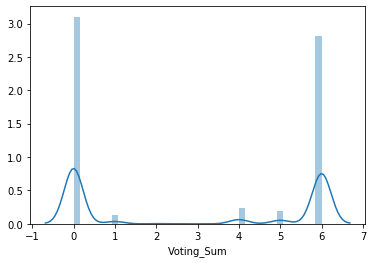

In [15]:
sns.distplot(train_voting_df['Voting_Sum'])

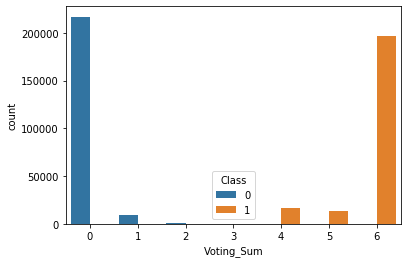

In [19]:
sns.countplot(x='Voting_Sum', data=train_voting_df[['Class', 'Voting_Sum']], hue='Class')

In [21]:
val_voting_df['Voting_Sum'] = val_voting_df.iloc[:, 1:7].sum(axis=1)
val_voting_df.head()

,Class,clf_ml_0_Prediction,clf_ml_1_Prediction,clf_ml_2_Prediction,clf_ml_3_Prediction,clf_ml_4_Prediction,clf_ann_0_Prediction,Voting_Sum
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


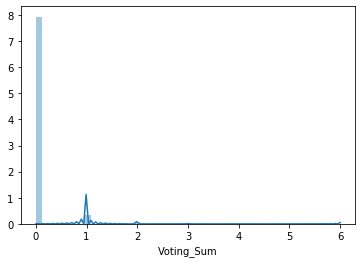

In [22]:
sns.distplot(val_voting_df['Voting_Sum'])

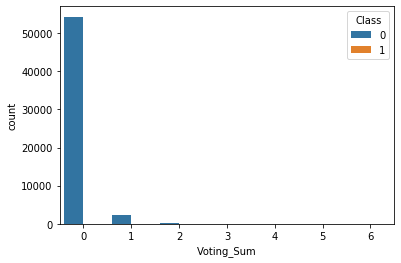

In [24]:
sns.countplot(x='Voting_Sum', data=val_voting_df[['Class', 'Voting_Sum']], hue='Class')

In [25]:
test_voting_df['Voting_Sum'] = test_voting_df.iloc[:, 1:7].sum(axis=1)
test_voting_df.head()

,Class,clf_ml_0_Prediction,clf_ml_1_Prediction,clf_ml_2_Prediction,clf_ml_3_Prediction,clf_ml_4_Prediction,clf_ann_0_Prediction,Voting_Sum
0,0.336927,0,0,0,0,0,0,0
1,0.832695,0,0,0,0,0,0,0
2,0.727552,0,0,0,0,0,0,0
3,0.209974,0,0,0,0,0,0,0
4,0.994020,0,0,0,0,0,0,0


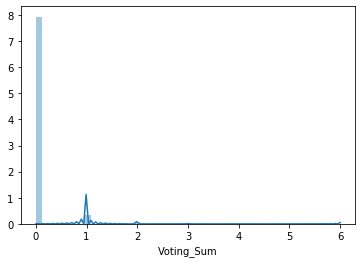

In [26]:
sns.distplot(test_voting_df['Voting_Sum'])

In [27]:
test_voting_df['Voting_Sum'].value_counts()

0    54235
1     2329
2      266
6       73
3       45
4        8
5        6
Name: Voting_Sum, dtype: int64